[1.5 0.  0.  7. ]
[1.5 0.  0.  7. ]
[1.5 0.  0.  7. ]
[1.5 0.  0.  7. ]
[1.5 0.  0.  7. ]
[1.5 0.  0.  7. ]
[1.50000000e+00 1.33273845e-08 3.92208119e-12 7.00000000e+00]
[1.50000000e+00 8.01651194e-09 2.57490214e-36 7.00000000e+00]
[1.5 0.  0.  7. ]
[1.50000000e+00 1.33280560e-08 3.92208119e-12 7.00000000e+00]
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -0.0
            Iterations: 5
            Function evaluations: 4
            Gradient evaluations: 1


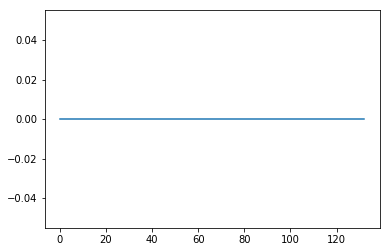

In [9]:
#SEM A ATUALIZAÇÃO DOS W A CADA ITERAÇÃO
import numpy as np # General numerics
from scipy.integrate import odeint # Integration
from scipy.optimize import minimize # Optimization
import matplotlib.pyplot as plt # Plotting
import pywt

ns=2

x10 = 1.5 
x20 = 0 
x30 = 0 
x40 = 7
w0 = np.zeros(ns)
for i in range(1,2):
    t = np.linspace(0,132,ns+1)
    #w0 = np.zeros(ns)

    def state(y,t,w):
    
        # unpack state variables
        x1,x2,x3,x4 = y
        # Make an array of the right hand sides of the four differential equations that make up our system.
        f = [ ((0.11*x3)/(0.006*x1+x3))*x1-(x1/(500*x4))*w,
            ((0.0055*x3)/(0.0001+x3*(1+10*x3)))*x1-0.01*x2-(x2/(500*x4))*w,
            -((0.11*x3)/(0.006*x1+x3))*x1/0.47 - ((0.0055*x3)/(0.0001+x3*(1+10*x3)))*x1/1.2 - 0.029*x3*x1/(0.0001+x3) + (1-x3/500)*(w/x4),
            w/500]
            
        return f
        
    def objective(w0):
    
        # Set initial guesses
        y0 = [x10,x20,x30,x40]
        res=[];
        for ks in range(0, ns):
            sol = odeint(state,y0,np.linspace(t[ks],t[ks+1],5), args=(w0[ks],), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0, tfirst=False)
            y0=sol[-1]
        obj = -sol[-1][1]*sol[-1][3]
        #print(obj)
    
        return obj
    
    def constraint(w0):
        x1p=[]
        x2p=[]
        x3p=[]
        x4p=[]
        cons=[]
        # Set initial guesses
        y0 = [x10,x20,x30,x40]
        for ks in range(0, ns):
            #print(t[ks+1])
            sol = odeint(state,y0,np.linspace(t[ks],t[ks+1],20), args=(w0[ks],))
            y0=sol[-1]  
            print(sol[-1])

            #FAZENDO A MATRIZ DE CADA X NO TEMPO
            for oj in range(0,len(sol)):
                    x1p.append(sol[oj][0])
                    x3p.append(sol[oj][2])
                    x4p.append(sol[oj][3])
            #CONTRUINDO O VETOR DA INEQUAÇÃO
            c1=np.add(x1p,-40.)
            c2=np.add(x3p,-25.)
            c3=np.add(x4p,-10.)
            c4=np.multiply(x1p,-1)
            c5=np.multiply(x3p,-1)
            c6=np.multiply(x4p,-1)
            for o1 in range(0,len(c1)):
                cons.append(c1[o1])
            for o2 in range(0,len(c2)):
                cons.append(c2[o2])
            for o3 in range(0,len(c3)):
                cons.append(c3[o3])
            for o4 in range(0,len(c4)):
                cons.append(c4[o4])
            for o5 in range(0,len(c5)):
                cons.append(c5[o5])
            for o6 in range(0,len(c6)):
                cons.append(c6[o6])
        return cons
     
    
    cons={'type':'ineq','fun': constraint}
   
    res = minimize(objective,w0,method='SLSQP', jac=None, bounds=[(0,50)]*ns, constraints=cons, tol=None, callback=None,options={'disp':True})
    plt.figure(i)
    plt.step(np.linspace(0,132,ns),res.x)
    ns=ns*2

In [3]:

    
   #SEM A ATUALIZAÇÃO DOS W A CADA ITERAÇÃO
import numpy as np # General numerics
from scipy.integrate import odeint # Integration
from scipy.optimize import minimize # Optimization
import matplotlib.pyplot as plt # Plotting
import pywt

ns=16

x10 = 1.5 
x20 = 0 
x30 = 0 
x40 = 7
fres=0
dif=1
tol=1e-4

while dif>tol:
    t = np.linspace(0,132,ns+1)
    w0 = np.ones(ns)
    w0 = np.multiply(w0,0)
    def state(y,t,w):
        x1,x2,x3,x4 = y
        f=[(0.11*x3/(0.006*x1+x3))*x1-x1*w/(x4*500),
           (0.0055*x3/(0.0001+x3*(1+10*x3)))*x1-0.01*x2-x2*w/(500*x4),
           -(0.11*x3/(0.006*x1+x3))*x1/0.47-(0.0055*x3/(0.0001+x3*(1+10*x3)))*x1/1.2-0.029*x3*x1/(0.0001+x3)+(1-x3/500)*w/x4,
           w/500]
        return f
        
    def objective(w0):
    
        # Set initial guesses
        y0 = [x10,x20,x30,x40]
        for ks in range(0, ns):
            sol = odeint(state,y0,np.linspace(t[ks],t[ks+1],5), args=(w0[ks],), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0, tfirst=False)
            y0=sol[-1]
            
        
        obj = -sol[-1][1]*sol[-1][3]
        #print(obj)
    
        return obj
    
    def constraint(w0):
        x1p=[]
        x3p=[]
        x4p=[]
        cons=[]
        # Set initial guesses
        y0 = [x10,x20,x30,x40]
        for ks in range(0, ns-1):
            sol = odeint(state,y0,np.linspace(t[ks],t[ks+1],20), args=(w0[ks],))
            y0=sol[-1]  

            #FAZENDO A MATRIZ DE CADA X NO TEMPO
            for oj in range(0,len(sol)):
                    x1p.append(sol[oj][0])
                    x3p.append(sol[oj][2])
                    x4p.append(sol[oj][3])
            #CONTRUINDO O VETOR DA INEQUAÇÃO
            c4=np.multiply(x1p,-1)
            c5=np.multiply(x3p,-1)
            c6=np.multiply(x4p,-1)
            c1=np.add(c4,40.)
            c2=np.add(c5,25.)
            c3=np.add(c6,10.)
            for o1 in range(0,len(c1)):
                cons.append(c1[o1])
            for o2 in range(0,len(c2)):
                cons.append(c2[o2])
            for o3 in range(0,len(c3)):
                cons.append(c3[o3])
            for o4 in range(0,len(x1p)):
                cons.append(x1p[o4])
            for o5 in range(0,len(x3p)):
                cons.append(x3p[o5])
            for o6 in range(0,len(x4p)):
                cons.append(x4p[o6])
        return cons
    
     
    
    cons={'type':'ineq','fun': constraint}
   
    res = minimize(objective,w0,method='SLSQP', jac=None, bounds=[(0,50)]*ns, constraints=cons, tol=None, callback=None,options={'disp':True})
    
    
    #w0 = res.x
    #ks = 0
    #y0 = [x10,x20,x30,x40]
    #for ks in range(0, ns):
    #        sol = odeint(state,y0,np.linspace(t[ks],t[ks+1],40), args=(w0[ks],), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0, tfirst=False)
    #        y0=sol[-1]
    dif=abs((res.x-fres)/fres)
    fres=res.x
    plt.step(np.linspace(0,132,ns),res.x)
    ns=ns*2
    w01=res.x
    w02=res.x
    w0=[]
    for ol in range(0,len(res.x)):
        w0.append(w01[ol])
        w0.append(w02[ol])
    if res.status!=0: 
        t = np.linspace(0,15,ns+1)
        w0 = np.zeros(ns)
    print(res.x)
    
    
   
    res = minimize(objective,w0,method='SLSQP', jac=None, bounds=[(0,50)]*ns, constraints=cons, tol=None, callback=None,options={'disp':True})
    plt.step(np.linspace(0,132,ns),res.x)
    ns=ns*2

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -93.0042024919127
            Iterations: 151
            Function evaluations: 2832
            Gradient evaluations: 149
94.0042024919127


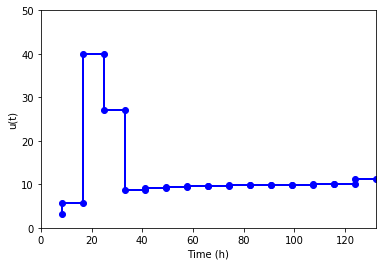

16
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -93.02024536022668
            Iterations: 65
            Function evaluations: 1385
            Gradient evaluations: 65
0.00017249616559405912


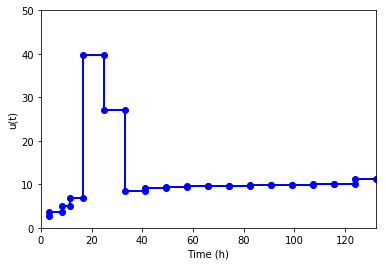

18
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -93.02232293637252
            Iterations: 85
            Function evaluations: 2005
            Gradient evaluations: 85
2.2334666370650374e-05


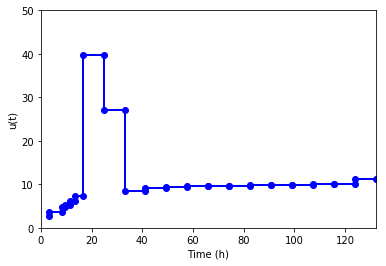

20


In [10]:
import numpy as np 
from scipy.integrate import odeint
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pywt
import statistics

#Condições iniciais
x10 = 1.5 
x20 = 0 
x30 = 0 
x40 = 7
ns=16
i=1

#variáveis para armazenar dados para plot
tg=[0]*i
data2=[0]*i
t = np.linspace(0,132,ns+1)
w0 = np.ones(ns)*25
err=1
err1=1
tol=1e-4

while err>tol:
    
    #t = np.linspace(0,15,ns+1)
    #w0 = np.zeros(ns)
    def state(y,t,w):
        x1,x2,x3,x4 = y
        f=[(0.11*x3/(0.006*x1+x3))*x1-x1*w/(x4*500),
           (0.0055*x3/(0.0001+x3*(1+10*x3)))*x1-0.01*x2-x2*w/(500*x4),
           -(0.11*x3/(0.006*x1+x3))*x1/0.47-(0.0055*x3/(0.0001+x3*(1+10*x3)))*x1/1.2-0.029*x3*x1/(0.0001+x3)+(1-x3/500)*w/x4,
           w/500]
        return f

    def objective(w0):
        y0 = [x10,x20,x30,x40]
        res=[];
        for ks in range(0, ns):
            sol = odeint(state,y0,np.linspace(t[ks],t[ks+1],20), args=(w0[ks],), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0, tfirst=False)
            y0=sol[-1]
        obj = -sol[-1][1]*sol[-1][3]
        return obj
    
    def constraint(w0):
        x1p=[]
        x3p=[]
        x4p=[]
        cons=[]
        # Set initial guesses
        y0 = [x10,x20,x30,x40]
        for ks in range(0, ns-1):
            sol = odeint(state,y0,np.linspace(t[ks],t[ks+1],20), args=(w0[ks],))
            y0=sol[-1]  

            #FAZENDO A MATRIZ DE CADA X NO TEMPO
            for oj in range(0,len(sol)):
                    x1p.append(sol[oj][0])
                    x3p.append(sol[oj][2])
                    x4p.append(sol[oj][3])
            #CONTRUINDO O VETOR DA INEQUAÇÃO
            c4=np.multiply(x1p,-1)
            c5=np.multiply(x3p,-1)
            c6=np.multiply(x4p,-1)
            c1=np.add(c4,40.)
            c2=np.add(c5,25.)
            c3=np.add(c6,10.)
            for o1 in range(0,len(c1)):
                cons.append(c1[o1])
            for o2 in range(0,len(c2)):
                cons.append(c2[o2])
            for o3 in range(0,len(c3)):
                cons.append(c3[o3])
            for o4 in range(0,len(x1p)):
                cons.append(x1p[o4])
            for o5 in range(0,len(x3p)):
                cons.append(x3p[o5])
            for o6 in range(0,len(x4p)):
                cons.append(x4p[o6])
        return cons
    
     
    
    cons={'type':'ineq','fun': constraint}
    
    res = minimize(objective,w0,method='SLSQP', jac=None, bounds=[(0,50)]*ns, constraints=cons, tol=None, callback=None,options={'maxiter':100000000,'ftol':1e-10,'disp':True})
    y0 = [x10,x20,x30,x40]
    err=abs((res.fun-err1)/err1)
    err1=res.fun
    w0 = res.x
    print(err)
        
    db1 = pywt.Wavelet('db1')
    maxlevel=pywt.dwt_max_level(len(res.x), db1)
    # mesmo se eu não usar o dwt_max_level o wavedec já calcula no max de níveis possiveis
    
    cD = pywt.wavedec(res.x, db1,mode='symmetric',level=maxlevel)
    t1=t
    Cdvr=statistics.pstdev(cD[-1])
    Thr=Cdvr*(2*np.log(len(cD[-1])))**(1/2)
    
    #cX=[x for x in abs(cD[-1]) if x > abs(Thr)]
    indx = np.where(abs(cD[-1])>abs(Thr))
    z=0
    for x in range(len(indx[0]),0,-1):
        x=x-1
        if indx[0][x]!=0:
            t=np.insert(t,indx[0][x]*2,(t[indx[0][x]*2-1]*0.6+t[indx[0][x]*2]*0.4))
            w0=np.insert(w0,indx[0][x]*2,w0[indx[0][x]*2-1])
            t=np.insert(t,indx[0][x]*2-1,(t[indx[0][x]*2-2]*0.6+t[indx[0][x]*2-1]*0.4))
            w0=np.insert(w0,indx[0][x]*2-1,w0[indx[0][x]*2+z-2])
        
        else:
            t=np.insert(t,indx[0][x]*2+1,(t[indx[0][x]*2]*0.6+t[indx[0][x]*2+1]*0.4))
            w0=np.insert(w0,indx[0][x]*2+1,w0[indx[0][x]*2])
        
        
    # Usei isso aqui somente para verificar a integração com o controle otimo
    for ks in range(0, ns):
         #   sol = odeint(state,y0,np.linspace(t[ks],t[ks+1],5), args=(w0[ks],), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0, tfirst=False)
            sol = odeint(state,y0,np.linspace(t[ks],t[ks+1],20), args=(w0[ks],))
            y0=sol[-1]
    
    #Plot u(t) vs tempo
    plt.figure(i)
    plt.step(t1[1:ns+1],res.x,'bo',LineWidth=2)
    plt.axis([0, 132, 0, 50])
    plt.xlabel("Time (h)")
    plt.ylabel("u(t)")
    plt.show()
    print(ns)
    #atualização do ns
    ns=len(t)-1
    i=i+1
